<a href="https://colab.research.google.com/github/dasog94/stock/blob/master/LSTM_stock_prediction(practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time

In [0]:
#lstm.py

import warnings
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt

warnings.filterwarnings(action="ignore")

def load_data(filename, seq_len, normalise_window):
  f = open(filename, 'r').read()
  data = f.split('\n')

  sequence_length = seq_len + 1
  result = []
  for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])

  if normalise_window:
    result = normalise_windows(result)

  result = np.array(result)

  row = round(0.9 * result.shape[0])
  train = result[:int(row), :]
  np.random.shuffle(train)
  x_train = train[:, :-1]
  y_train = train[:, -1]
  x_test = result[int(row):, :-1]
  y_test = result[int(row):, -1]

  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
  normalised_data = []
  for window in window_data:
    normalise_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalised_data.append(normalise_window)
  return normalised_data

def predict_sequences_multiple(model, data, window_size, prediction_len):
    prediction_seqs = []
    for i in range((int)(len(data)/prediction_len)):
      curr_frame = data[i*prediction_len]
      predicted = []
      for j in range(prediction_len):
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
      prediction_seqs.append(predicted)
    return prediction_seqs

def plot_results_multiple(predicted_data, true_data, prediction_len):
  fig = plt.figure(facecolor='white')
  ax = fig.add_subplot(111)
  ax.plot(true_data, label='True Data')
  print('yo') 
  #Pad the list of predictions to shift it in the graph to it's correct start
  for i, data in enumerate(predicted_data):
      padding = [None for p in range(i * prediction_len)]
      plt.plot(padding + data, label='Prediction')
      plt.legend()
  plt.show()




In [0]:
#1단계: 데이터 불러오기
X_train, y_train, X_test, y_test = load_data('sp500.csv', 50, True)
#데이터 확인
print(X_train)

[[[ 0.        ]
  [ 0.00385103]
  [ 0.00402758]
  ...
  [ 0.04577555]
  [ 0.03775396]
  [ 0.03873768]]

 [[ 0.        ]
  [ 0.00583628]
  [ 0.00610128]
  ...
  [ 0.03499438]
  [ 0.03310085]
  [ 0.03822812]]

 [[ 0.        ]
  [ 0.0092607 ]
  [ 0.00693538]
  ...
  [ 0.01506737]
  [ 0.02421246]
  [ 0.02378409]]

 ...

 [[ 0.        ]
  [ 0.00141705]
  [-0.0030649 ]
  ...
  [ 0.00960071]
  [ 0.02342868]
  [ 0.03127017]]

 [[ 0.        ]
  [ 0.00313496]
  [ 0.00523421]
  ...
  [-0.04842273]
  [-0.02952245]
  [-0.02887865]]

 [[ 0.        ]
  [-0.00276329]
  [ 0.01683672]
  ...
  [-0.06702946]
  [-0.05360813]
  [-0.0398607 ]]]


In [0]:
#2단계 : 모델
  model = Sequential()

  model.add(LSTM(
      input_dim = 1,
      output_dim = 50,
      return_sequences=True))
  model.add(Dropout(0.2))

  model.add(LSTM(
      100,
      return_sequences=False))
  model.add(Dropout(0.2))

  model.add(Dense(
      output_dim=1))
  model.add(Activation("linear"))

  start = time.time()
  model.compile(loss="mse", optimizer="rmsprop")
  print("Compilation Time : ", time.time() - start)

Compilation Time :  0.015399694442749023


In [0]:
model.fit(
    X_train,
    y_train,
    batch_size=10,
    nb_epoch = 50,
    validation_split = 0.05
)

Train on 3523 samples, validate on 186 samples
Epoch 1/50
3523/3523 [==============================] - 89s 25ms/step - loss: 5.7711e-04 - val_loss: 6.8514e-04
Epoch 2/50
3523/3523 [==============================] - 87s 25ms/step - loss: 3.7985e-04 - val_loss: 4.3921e-04
Epoch 3/50
3523/3523 [==============================] - 87s 25ms/step - loss: 3.1363e-04 - val_loss: 1.7628e-04
Epoch 4/50
3523/3523 [==============================] - 87s 25ms/step - loss: 2.7627e-04 - val_loss: 1.7783e-04
Epoch 5/50
3523/3523 [==============================] - 90s 25ms/step - loss: 2.6677e-04 - val_loss: 1.6793e-04
Epoch 6/50
3523/3523 [==============================] - 87s 25ms/step - loss: 2.5159e-04 - val_loss: 1.6222e-04
Epoch 7/50
3523/3523 [==============================] - 86s 24ms/step - loss: 2.4796e-04 - val_loss: 1.3839e-04
Epoch 8/50
3523/3523 [==============================] - 86s 25ms/step - loss: 2.4397e-04 - val_loss: 2.0368e-04
Epoch 9/50
3523/3523 [==============================] - 8

yo


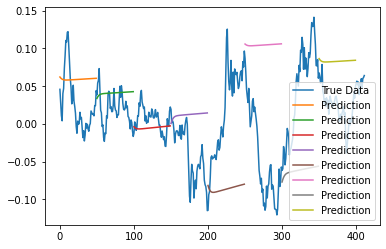

In [0]:
predictions = predict_sequences_multiple(model, X_test, 50, 50)
plot_results_multiple(predictions, y_test, 50)